大家看过了数值数据随时间变化的曲线，但是，却鲜有可视化的工具能很好地对类别特征随着时间变化进行绘制。本文就介绍一种很好的类别特征可视化工具PyCatFlow，非常的简单且实用。

## PyCatFlow

PyCatFlow 是一个 Python 包，用于可视化**类别数据的时间变化**。它的灵感来自 Bernhard Rieder 的可视化工具 **RankFlow**，它允许将排名列表随着时间的推移进行可视化，例如，Google 或 YouTube 上查询的搜索结果的变化。在我看来，尽管它的用户界面极简,RankFlow 是一个非常有用的工具，而且我很难为其准备数据。事实证明，这些困难主要源于“滥用”RankFlow，或者用更积极的术语来说，它源于将 RankFlow 用于其设计目的以外的其他目的。

## 背景：了解RankFlow
RankFlow 允许比较排名列表（随着时间的推移）。 在最简单的形式中，它需要以每列代表一个排名列表的方式排列表格数据。

```
Time 1,Time 2,Time 3,Time 4
Item 1,Item 1,Item 1,Item 2
Item 2,Item 4,Item 2,Item 1
Item 3,Item 2,Item 4,Item 4
Item 4,Item 3,Item 5,Item 5
```

每个排名列表都可以通过权重进行补充，从而为数据添加另一层信息。 例如，如果我们采用 YouTube 搜索结果数据，则可以将观看次数、赞成票数或赞成票反对率用作权重信息。 为简单起见，示例数据仅由排名列表组成，并在以下流程图中显示结果。

![](img/rankflow.png)


为了加快图表的后处理速度，我决定创建一个类似于 RankFlow 的可视化工具，它非常适合不包含显式排名信息但可能包含额外分类数据的时间数据。


## PyCatFlow快速上手

![](img/sample_viz.png)

如果我们用两种不同颜色，灰色和绿色分别表示男生和女生，然后每一个格子表示一类电影，横轴是男生和女生随着时间推移看的不同的电影，这样我们就可以一目了然男生和女生的喜好的变化，真的是太直观了！
PyCatFlow大大方便了我们对于类别特征随着时间变化的分析。

**准备数据**

In [ ]:
import pandas as pd

df = pd.read_csv("data/sample_data_ChatterBot_Requirements.csv", sep='\t')
df.head(5)

|    | column     | items             | category       |   column order |
|---:|:-----------|:------------------|:---------------|---------------:|
|  0 | 2015-09-08 | fuzzywuzzy        | A_Requirements |              1 |
|  1 | 2015-09-08 | requests          | A_Requirements |              1 |
|  2 | 2015-09-08 | requests-oauthlib | A_Requirements |              1 |
|  3 | 2015-09-08 | pymongo           | A_Requirements |              1 |
|  4 | 2015-09-08 | jsondatabase      | A_Requirements |              1 |

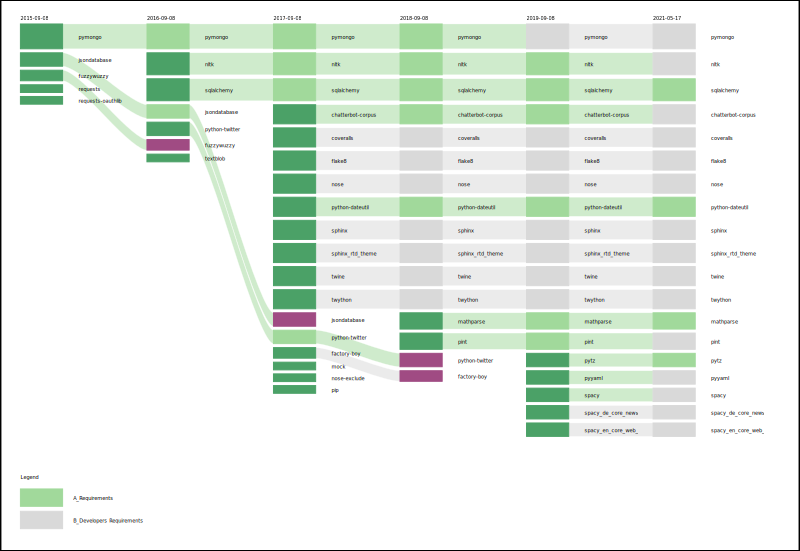

In [4]:
import pycatflow as pcf

# Load and parse data from file
fname="data/sample_data_ChatterBot_Requirements.csv"
data = pcf.read_file(fname, columns="column", nodes="items", categories="category", column_order="column order")

'''
visualize(data, spacing=50, node_size=10, width=None, height=None, minValue=1, maxValue=10, node_scaling="linear",
          connection_type="semi-curved", color_startEnd=True, color_categories=True, nodes_color="gray",
          start_node_color="green", end_node_color="red", palette=None, show_labels=True,
          label_text="item", label_font="sans-serif", label_color="black", label_size=5,
          label_shortening="clip", label_position="nodes", line_opacity=0.5, line_stroke_color="white",
          line_stroke_width=0.5, line_stroke_thick=0.5, legend=True, sort_by="frequency")
'''

viz = pcf.visualize(data, spacing=20, width=800, maxValue=20, minValue=2)

#save visualization to files
viz.savePng('sample_viz.png')
viz.saveSvg('sample_viz.svg')

#show visualization
viz

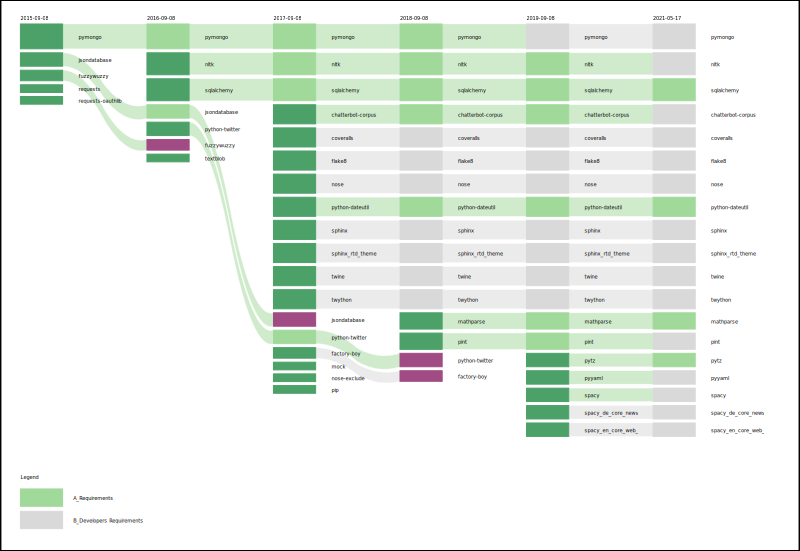

In [5]:
# Another option is to visualize the graph with curved connections.
# The implementation of this connection type draws on https://github.com/bernorieder/RankFlow

viz = pcf.visualize(data, spacing=20, width=800, maxValue=20, minValue=2, connection_type='curved')
viz

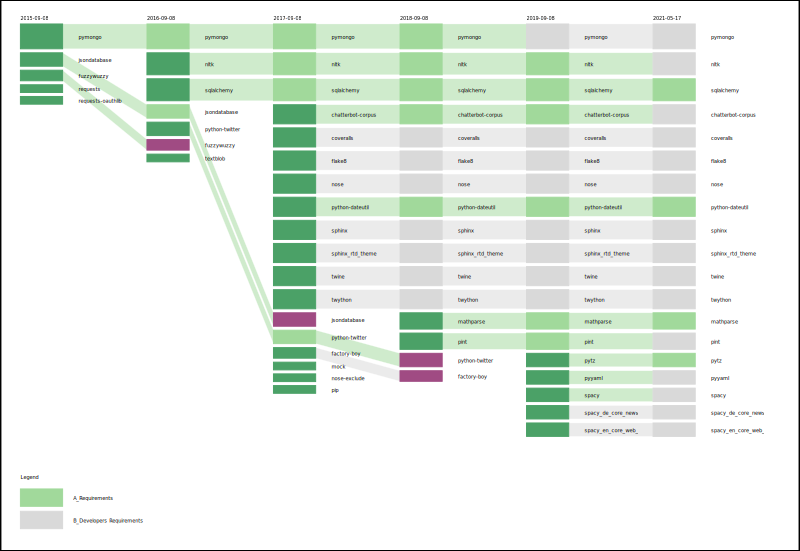

In [6]:
# The third option are straight connections between nodes
viz = pcf.visualize(data, spacing=20, width=800, maxValue=20, minValue=2, connection_type='straight')

# show visualization
viz

## 参考文献

https://gist.github.com/bumatic/83c3423595cde010da7ad059c6b8b2f5
https://medium.com/@bumatic/pycatflow-visualizing-categorical-data-over-time-b344102bcce2
https://gist.github.com/bumatic/83c3423595cde010da7ad059c6b8b2f5
​
